## Assignment

Titanic dataset is one of the datasets available in sklearn.
You are given:
1. A Training dataset csv file with X train and Y train data
2. A X test File and you have to predict and submit predictions for this file.


## FOR TRAINING DATA

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from  sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from io import StringIO
%matplotlib inline  #to cfreate graph inside the notebook
import os
os.listdir() # returns list of all files and directories in the specified directory

['.ipynb_checkpoints',
 'Anjali_LRPredictions.csv',
 'exercise - TITANIC DATASET.ipynb',
 'titanic_test.csv',
 'titanic_train.csv']

In [6]:
# sklearn module only takes numerical inputs 

In [7]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

In [8]:
train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.000,NaN,S,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.050,NaN,S,0
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.000,NaN,S,0
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,NaN,S,0
4,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S,0


In [9]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,NaN,S
1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S
2,3,"Kilgannon, Mr. Thomas J",male,NaN,0,0,36865,7.7375,NaN,Q
3,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24.0,2,1,243847,27.0000,NaN,S
4,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,E25,S


In [10]:
train.shape

(668, 11)

In [11]:
test.shape

(223, 10)

In [12]:
train.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,668.000000,536.000000,668.000000,668.000000,668.000000,668.000000
mean,2.296407,29.700560,0.528443,0.407186,32.064552,0.402695
std,0.831638,14.240257,1.080327,0.854695,45.320835,0.490808
min,1.000000,0.670000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.925000,0.000000
50%,3.000000,29.000000,0.000000,0.000000,14.750000,0.000000
75%,3.000000,38.250000,1.000000,0.000000,31.275000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [13]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,223.000000,178.000000,223.000000,223.000000,223.000000
mean,2.345291,29.694775,0.506726,0.304933,32.622551
std,0.850047,15.398053,1.169700,0.634108,61.062047
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,19.250000,0.000000,0.000000,7.879200
50%,3.000000,27.000000,0.000000,0.000000,12.475000
75%,3.000000,37.750000,1.000000,0.000000,30.035400
max,3.000000,71.000000,8.000000,2.000000,512.329200


In [14]:
#checking NaN values in each column of train dataset.
train.isna().sum()

Pclass        0
Name          0
Sex           0
Age         132
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       514
Embarked      1
Survived      0
dtype: int64

In [15]:
train.dtypes

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
Survived      int64
dtype: object

###### difference b/w labels and features : 
Features are the fields used as input and labels are used as output. As a simple example, consider how to predict whether one should sell a car based on car mileage, year, etc. Yes/no is the label whereas the mileage and year would be the features

In [16]:
train['Embarked'].value_counts()

S    484
C    133
Q     50
Name: Embarked, dtype: int64

In [17]:
# onehotencoding, lableencoder
# Embarked, Sex = labelencoder.
## drop Name,Ticket, Cabin
## mean = age.

DataFrame.astype(dtype, copy=True, errors='raise') : Cast a pandas object to a specified dtype dtype.

fit_transform(y): Fit label encoder and return encoded labels.

Series.unique() :
Return unique values of Series object.

##### label encoder

In machine learning, we usually deal with datasets that contain multiple labels in one or more than one column. These labels can be in the form of words or numbers. To make the data understandable or in human-readable form, the training data is often labelled in words. 

Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated.

In [18]:
label_encoder = preprocessing.LabelEncoder()

In [19]:
#we are converting S,C,Q to 0,1,2
train['Embarked'] = train['Embarked'].astype(str)
train['Embarked'] = label_encoder.fit_transform(train['Embarked'])
train['Embarked'].head()

0    2
1    2
2    2
3    2
4    2
Name: Embarked, dtype: int32

In [20]:
train['Embarked'].unique()

array([2, 0, 1, 3])

In [21]:
### we are converting 'male' and 'female' in sex column to 0 and 1

train['Sex'] = label_encoder.fit_transform(train['Sex'])
train['Sex'].unique()

array([0, 1])

In [22]:
train

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",0,29.0,1,0,228414,26.0000,NaN,2,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",1,NaN,0,0,A/5 2466,8.0500,NaN,2,0
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",1,39.0,0,0,250655,26.0000,NaN,2,0
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,NaN,2,0
4,3,"Sutehall, Mr. Henry Jr",1,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,2,0
...,...,...,...,...,...,...,...,...,...,...,...
663,2,"Ilett, Miss. Bertha",0,17.0,0,0,SO/C 14885,10.5000,NaN,2,1
664,3,"Morrow, Mr. Thomas Rowan",1,NaN,0,0,372622,7.7500,NaN,1,0
665,3,"Bing, Mr. Lee",1,32.0,0,0,1601,56.4958,NaN,2,1
666,3,"Strandberg, Miss. Ida Sofia",0,22.0,0,0,7553,9.8375,NaN,2,0


In [23]:
mean_age = int(train['Age'].mean())

In [24]:
train['Age'] = train['Age'].fillna(mean_age)

In [25]:
train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",0,29.0,1,0,228414,26.000,NaN,2,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",1,29.0,0,0,A/5 2466,8.050,NaN,2,0
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",1,39.0,0,0,250655,26.000,NaN,2,0
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.075,NaN,2,0
4,3,"Sutehall, Mr. Henry Jr",1,25.0,0,0,SOTON/OQ 392076,7.050,NaN,2,0


In [26]:
#removing 3 columns as there is no corealtion of these columns with the prediction data
train = train.drop(['Name', 'Ticket', 'Cabin'], axis = 1)

In [27]:
train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,2,0,29.0,1,0,26.000,2,1
1,3,1,29.0,0,0,8.050,2,0
2,2,1,39.0,0,0,26.000,2,0
3,3,0,29.0,0,4,21.075,2,0
4,3,1,25.0,0,0,7.050,2,0


In [28]:
train.shape

(668, 8)

In [29]:
# to build any model using sklearn we have to specifically define the target variable and all the 
# independent variables 
# Dependent variables are the output of the process
# Independent variables are the input of the process
# stratify will make similar distribution of classes in both the training data and testing data

In [30]:
## survived is the target variable

#0 : passenger did not survived
#1 : passenger did survived.

In [31]:
#checking missing values in each variable.
train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

In [32]:
#seperating independent and dependent variable :
#independent variables : all other variables than the target variable 
#dependent variable : output : target variable 'i.e. 'survived' column

In [33]:
Y = train['Survived'] # 'Survived' is the target variable
X = train.drop(['Survived'], axis = 1) # we stored all the other variables as independent variables 

In [34]:
Y

0      1
1      0
2      0
3      0
4      0
      ..
663    1
664    0
665    1
666    0
667    1
Name: Survived, Length: 668, dtype: int64

In [35]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,0,29.0,1,0,26.0000,2
1,3,1,29.0,0,0,8.0500,2
2,2,1,39.0,0,0,26.0000,2
3,3,0,29.0,0,4,21.0750,2
4,3,1,25.0,0,0,7.0500,2
...,...,...,...,...,...,...,...
663,2,0,17.0,0,0,10.5000,2
664,3,1,29.0,0,0,7.7500,1
665,3,1,32.0,0,0,56.4958,2
666,3,0,22.0,0,0,9.8375,2


In [36]:
#creating the train and validation set :
#stratify = y : It means similar disrtibution of classes in both test and train
#train : 75% of data
#test : 25 % of data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, random_state = 101, stratify = Y, test_size = 0.25)

In [37]:
# Python provides the preprocessing library, which contains the normalize function to normalize 
# the data. It takes an array in as an input and normalizes its values between 0 and 1

In [38]:
#distribution in the training set 
#value_counts : returns the count of all classes.
#normalize = True, it will return the percentage.

In [39]:
#distribution in training set
y_train.value_counts(normalize = True)
#here 0 : 59% are 0 

#here 1 : 40% are 1 

0    0.596806
1    0.403194
Name: Survived, dtype: float64

In [40]:
y_test.value_counts(normalize = True) #distribution is quite similar in both

0    0.598802
1    0.401198
Name: Survived, dtype: float64

In [41]:
x_train.shape , y_train.shape

((501, 7), (501,))

In [42]:
x_test.shape, y_test.shape

((167, 7), (167,))

In [43]:
#this is a classification problem where we have to predict whether the passengers on the titanic will 
#survive or will not survive.

In [44]:
#importing decision tree classifier:
from sklearn.tree import DecisionTreeClassifier

#creating the decision tree function
dt_model = DecisionTreeClassifier(random_state = 10) #everytime we run the model, we will get same results.

In [45]:
##importing decisiontree Regressor

from sklearn.tree import DecisionTreeRegressor # it is used in case of regression problems  

In [46]:
#fitting the model:
dt_model.fit(x_train, y_train) #default criteria of spliting is gini and we can change it to chi-square as well

DecisionTreeClassifier(random_state=10)

In [47]:
#checking the training score or acuracy:

dt_model.score(x_train, y_train) #our accuracy is 98%

0.9800399201596807

In [48]:
#checking the testing score or acuracy:

dt_model.score(x_test, y_test) #but accuracy for testing data is just 78%

0.7844311377245509

In [49]:
#training and testing accuracy are not in sync, training accuracy is very-2 high but testing accuracy is not that high

In [50]:
#predictions on testing data:
dt_model.predict(x_test)

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0], dtype=int64)

In [51]:
##we can check the probability of survived or not and 1sst col shows the prob of class 0 and 2nd column will tell us the prob of
#class 1

#when we use predict function, the threshold is 0.5 by default
# we can also use different thresholds to decide the class observation



dt_model.predict_proba(x_test)

array([[1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.

In [52]:
#let's play around threshold and see if the accuracy get's up:
y_pred = dt_model.predict_proba(x_test)[:,1] # we take the 1st column predicting the probabilities of
                                             # 1 and we save it in a variable


In [53]:
#now threshold is 0.6 instead of 0.5
new_y = []
for i in range(len(y_pred)):
    if y_pred[i] < 0.6:
        new_y.append(0) #any prob < 0.6 will be taken as 0
    else:
        new_y.append(1) #any prob > 0.6 will be taken as 1


In [54]:
#It is not necessary that after changing the threshold, the accuracy will increase and in some cases, the accuracy can decrease
#as well

from sklearn.metrics import accuracy_score
accuracy_score(y_test, new_y)

0.7844311377245509

In [55]:
## use some parameters to improve the accuracy

In [56]:
#max-depth : it tells us the longest path of the tree


### CHANGE IN MAX-DEPTH

In [57]:
## we are training the decision tree model 10 times and change the parameter max depth from 1 to 10
#for each model we are storing the training accuracy and testing accuracy

training_accuracy = []
testing_accuracy = []

for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth = depth, random_state = 10)
    dt_model.fit(x_train, y_train)
    training_accuracy.append(dt_model.score(x_train, y_train))
    testing_accuracy.append(dt_model.score(x_test, y_test))

In [58]:
# now we will create a dataframe from the values which we got from the previous cell
df = pd.DataFrame({'max_depth' : range(1,10), 'train_accuracy' : training_accuracy, 'test_accuracy' : testing_accuracy})
df.head(10)

,max_depth,train_accuracy,test_accuracy
0,1,0.772455,0.784431
1,2,0.778443,0.772455
2,3,0.810379,0.802395
3,4,0.812375,0.778443
4,5,0.848303,0.814371
5,6,0.862275,0.784431
6,7,0.894212,0.772455
7,8,0.904192,0.790419
8,9,0.928144,0.778443


<function matplotlib.pyplot.show(close=None, block=None)>

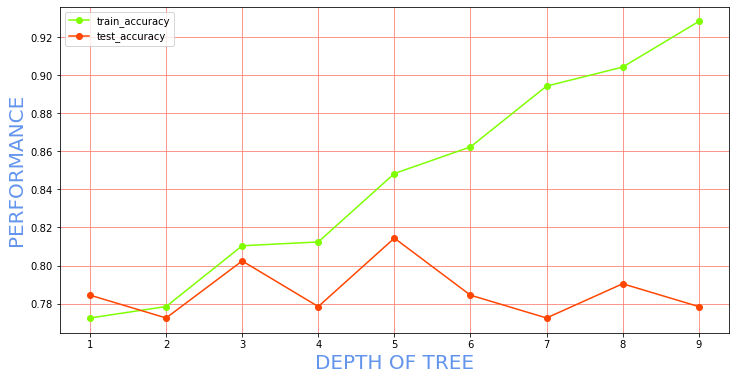

In [59]:
#plotting the graph :

plt.figure(figsize = (12,6))
plt.plot(df['max_depth'], df['train_accuracy'], marker = 'o', color = 'chartreuse',label = 'train_accuracy')
plt.plot(df['max_depth'], df['test_accuracy'], marker = 'o', color = 'orangered', label = 'test_accuracy')
plt.xlabel('DEPTH OF TREE', fontsize = 20, color = 'cornflowerblue')
plt.ylabel('PERFORMANCE', fontsize = 20, color = 'cornflowerblue')
plt.legend()
plt.grid(color = 'salmon')
plt.show()

In [60]:
#inference : when max_depth is 1, both training and testing accuracy is low, so lower value of max_depth didn't allow the model
#to learn the pattern so we get low performance so it is the case of underfitting

#as max_depth increasing so both the training and testing accuracy is increasing as well

#magnitude of training accuracy is higher as compared to the testing accuracy.

# 5 is the max_depth where testing accuracy is the highest 

#at max_depth 8 we get the highest accuracy for testing data after which the accuracy decreases so we yake the max_depth as 8

In [61]:
#other parameters :we can try with other parameters as well, we can also try with combination of parameters

#max_leaf_nodes
#min_samples_split
#min_samples_leaf


# 1. max_leaf_nodes : Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction 
#                     in impurity. If None, then unlimited number of leaf nodes.

# 2. min_samples_split: int or float, default=2. The minimum number of samples required to split an internal node

# 3. min_samples_leaf: int or float, default=1. The minimum number of samples required to be at a leaf node. 


#we can do this with one more technique which do this automatically for us and this is 'grid search', it helps in finding the
#optimum value for combination of parameters

In [62]:
## using combination of max_depth and max_leaf nodes
dt_model = DecisionTreeClassifier(max_depth = 8, max_leaf_nodes = 25, random_state = 10)


In [63]:
## fitting the training data:

dt_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=25, random_state=10)

In [64]:
#training score 
dt_model.score(x_train, y_train)

0.8862275449101796

In [65]:
#testing score
dt_model.score(x_test, y_test)

0.8023952095808383

In [66]:
## now the training and testing scores are more in sync, i. training accuracy : 88% and testing accuracy : 82% 
#the model we have created is a more generalized model
#we can play around diff parameters and choose the one which gives us best results

In [67]:
### creating decision tree

from sklearn.tree import export_graphviz
from IPython.display import Image
from io import StringIO
import pydotplus


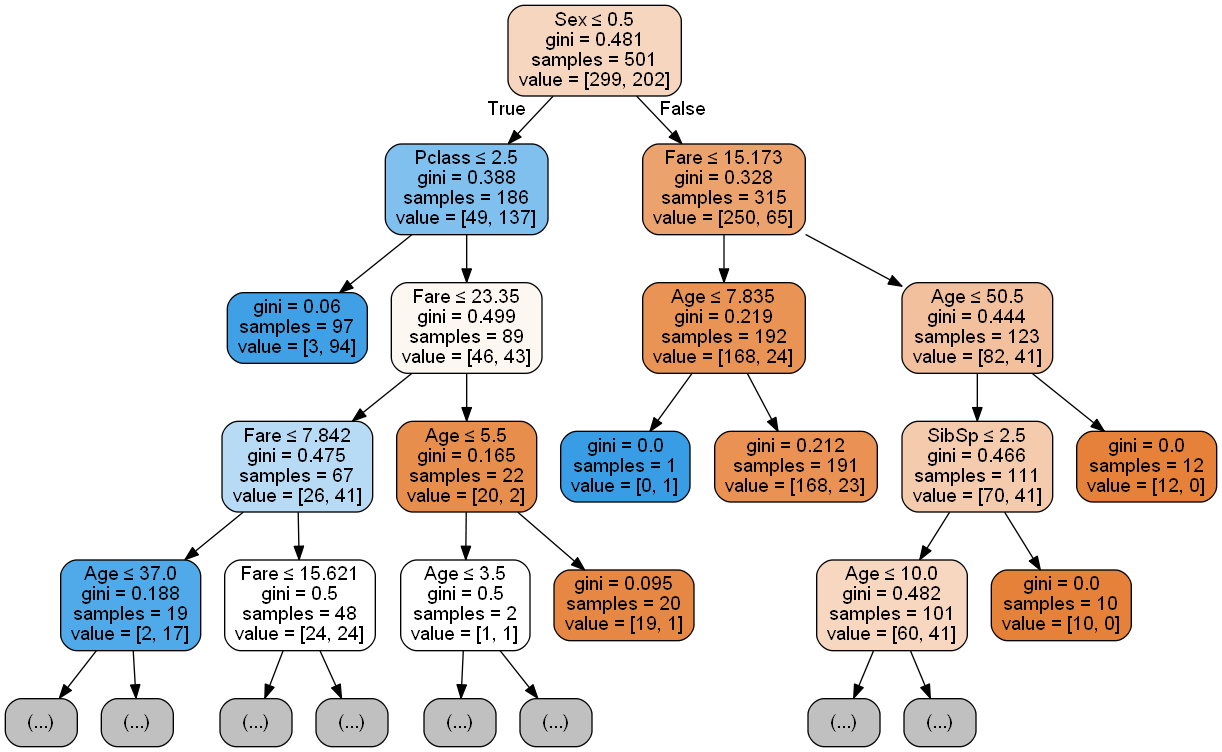

In [68]:
dot_data = StringIO()
export_graphviz(dt_model, out_file = dot_data, filled = True, special_characters = True, rounded = True, max_depth = 4, feature_names = x_train.columns )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#here max_depth represents the maximum depth of the representation it is diff from the max_depth of decision tree model,
#here max_depth prints the tree only till the specified depth, but the dt_model is trained till the depth that we 
#specified while training the model

#filled = True, it paints the majority class for classification

##  Applications of Decision Tree:


1) Fraud detection

2) Credit risk

3) Loan default : Default is the failure to repay a debt, including interest or principal, on a loan or security. 

4) Predicting sales of a retail outlet (or any other business!)

5) Number of bikes rented

6) Employee attrition : Employee attrition is defined as the natural process by which employees leave the workforce.

7) Customer churn : Customer churn is the percentage of customers that stopped using your company's product or service during a certain time frame.

If we grow a tree more than we should, we are likely to end up having an overfit model. Overfitting occurs when a tree fits the training set too well. Having very different accuracies on training and test sets is a strong indication of overfitting. In such cases, we should control the tree growth to obtain a well-generalized model.